In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fcproject2/train_dataset_final1.csv
/kaggle/input/fcproject2/validate_dataset_final.csv


In [2]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the datasets
train_df = pd.read_csv("/kaggle/input/fcproject2/train_dataset_final1.csv")
val_df = pd.read_csv("/kaggle/input/fcproject2/validate_dataset_final.csv")

# Show shapes
print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")

# Preview data
train_df.head()

Train shape: (25247, 27)
Validation shape: (5016, 26)


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [4]:
# Print all column names
print("All columns in train_df:")
for col in train_df.columns:
    print(col)

All columns in train_df:
Customer_ID
marriage
sex
education
LIMIT_BAL
age
pay_0
pay_2
pay_3
pay_4
pay_5
pay_6
Bill_amt1
Bill_amt2
Bill_amt3
Bill_amt4
Bill_amt5
Bill_amt6
pay_amt1
pay_amt2
pay_amt3
pay_amt4
pay_amt5
pay_amt6
AVG_Bill_amt
PAY_TO_BILL_ratio
next_month_default


In [5]:
# Check missing values
train_df.isnull().sum().sort_values(ascending=False)
val_df.isnull().sum().sort_values(ascending=False)

Customer_ID          0
marriage             0
AVG_Bill_amt         0
pay_amt6             0
pay_amt5             0
pay_amt4             0
pay_amt3             0
pay_amt2             0
pay_amt1             0
Bill_amt6            0
Bill_amt5            0
Bill_amt4            0
Bill_amt3            0
Bill_amt2            0
Bill_amt1            0
pay_6                0
pay_5                0
pay_4                0
pay_3                0
pay_2                0
pay_0                0
age                  0
LIMIT_BAL            0
education            0
sex                  0
PAY_TO_BILL_ratio    0
dtype: int64

In [6]:
# Drop rows with NaN values
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)

In [7]:
# Summary of training data
train_df.info()

# Check for missing values
train_df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 25121 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25121 non-null  int64  
 1   marriage            25121 non-null  int64  
 2   sex                 25121 non-null  int64  
 3   education           25121 non-null  int64  
 4   LIMIT_BAL           25121 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25121 non-null  int64  
 7   pay_2               25121 non-null  int64  
 8   pay_3               25121 non-null  int64  
 9   pay_4               25121 non-null  int64  
 10  pay_5               25121 non-null  int64  
 11  pay_6               25121 non-null  int64  
 12  Bill_amt1           25121 non-null  float64
 13  Bill_amt2           25121 non-null  float64
 14  Bill_amt3           25121 non-null  float64
 15  Bill_amt4           25121 non-null  float64
 16  Bill_amt5

Customer_ID           0
Bill_amt3             0
PAY_TO_BILL_ratio     0
AVG_Bill_amt          0
pay_amt6              0
pay_amt5              0
pay_amt4              0
pay_amt3              0
pay_amt2              0
pay_amt1              0
Bill_amt6             0
Bill_amt5             0
Bill_amt4             0
Bill_amt2             0
marriage              0
Bill_amt1             0
pay_6                 0
pay_5                 0
pay_4                 0
pay_3                 0
pay_2                 0
pay_0                 0
age                   0
LIMIT_BAL             0
education             0
sex                   0
next_month_default    0
dtype: int64

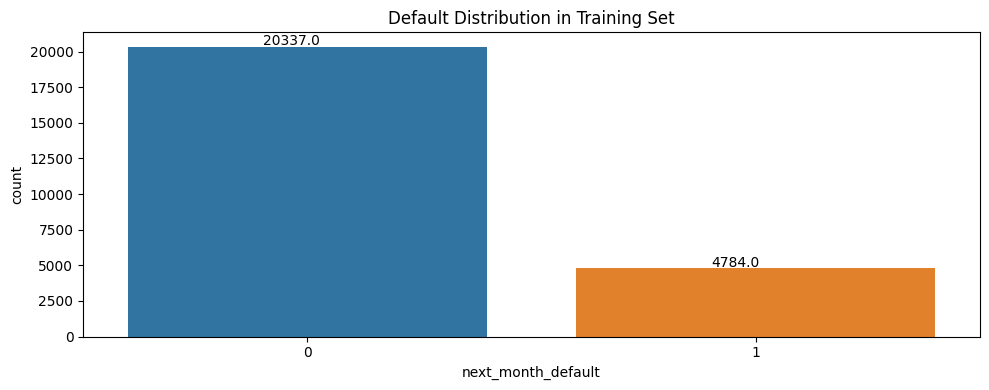

next_month_default
0    80.956172
1    19.043828
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='next_month_default', data=train_df)
plt.title('Default Distribution in Training Set')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 100))
plt.tight_layout()
plt.show()

# Percentage distribution
default_rate = train_df['next_month_default'].value_counts(normalize=True) * 100
print(default_rate)

In [9]:
# Save customer ID for validation predictions later
val_customers = val_df['Customer_ID']

# Drop ID columns from features
X = train_df.drop(columns=['Customer_ID', 'next_month_default'])
y = train_df['next_month_default']

# For validation set (drop only Customer Id)
X_val = val_df.drop(columns=['Customer_ID'])
assert list(X.columns) == list(X_val.columns), "Train and validation feature columns do not match!"

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split for development
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 20096
Test size: 5025


In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

**Next: Exploratory Data Analysis (EDA) + Financial Trends**

**Part A: Distribution & Basic Patterns**

**Part B: Correlation + Multicollinearity**

**Part C: Financial Behavior Analysis**


***Part A: Distribution & Basic Patterns***

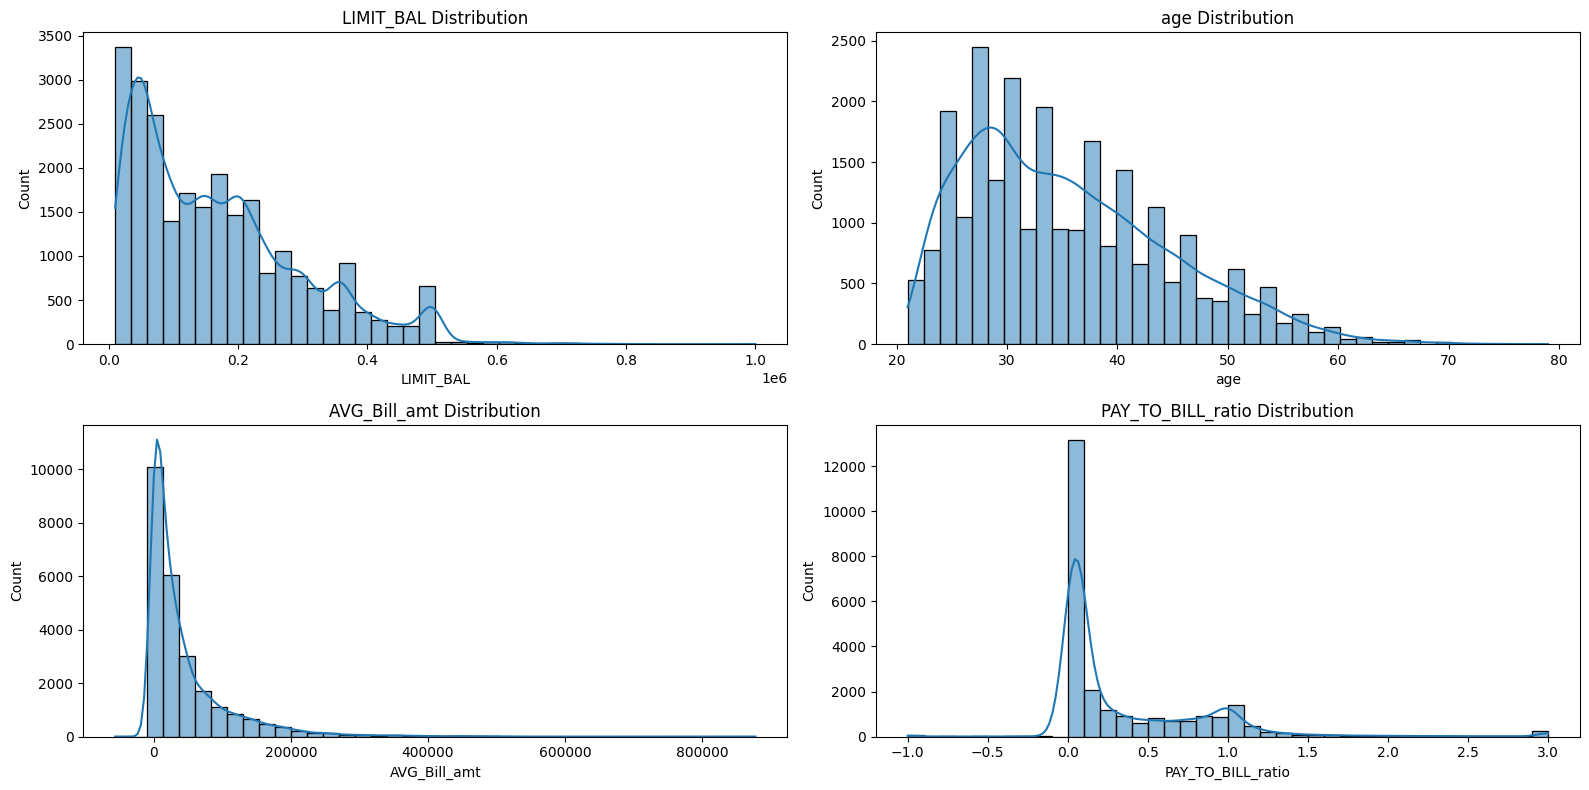

In [12]:
# Plot distributions of numerical variables
num_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']
# Clip extreme values
train_df['PAY_TO_BILL_ratio'] = train_df['PAY_TO_BILL_ratio'].clip(-1, 3)

plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[col], kde=True, bins=40)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

Transformation for better insights

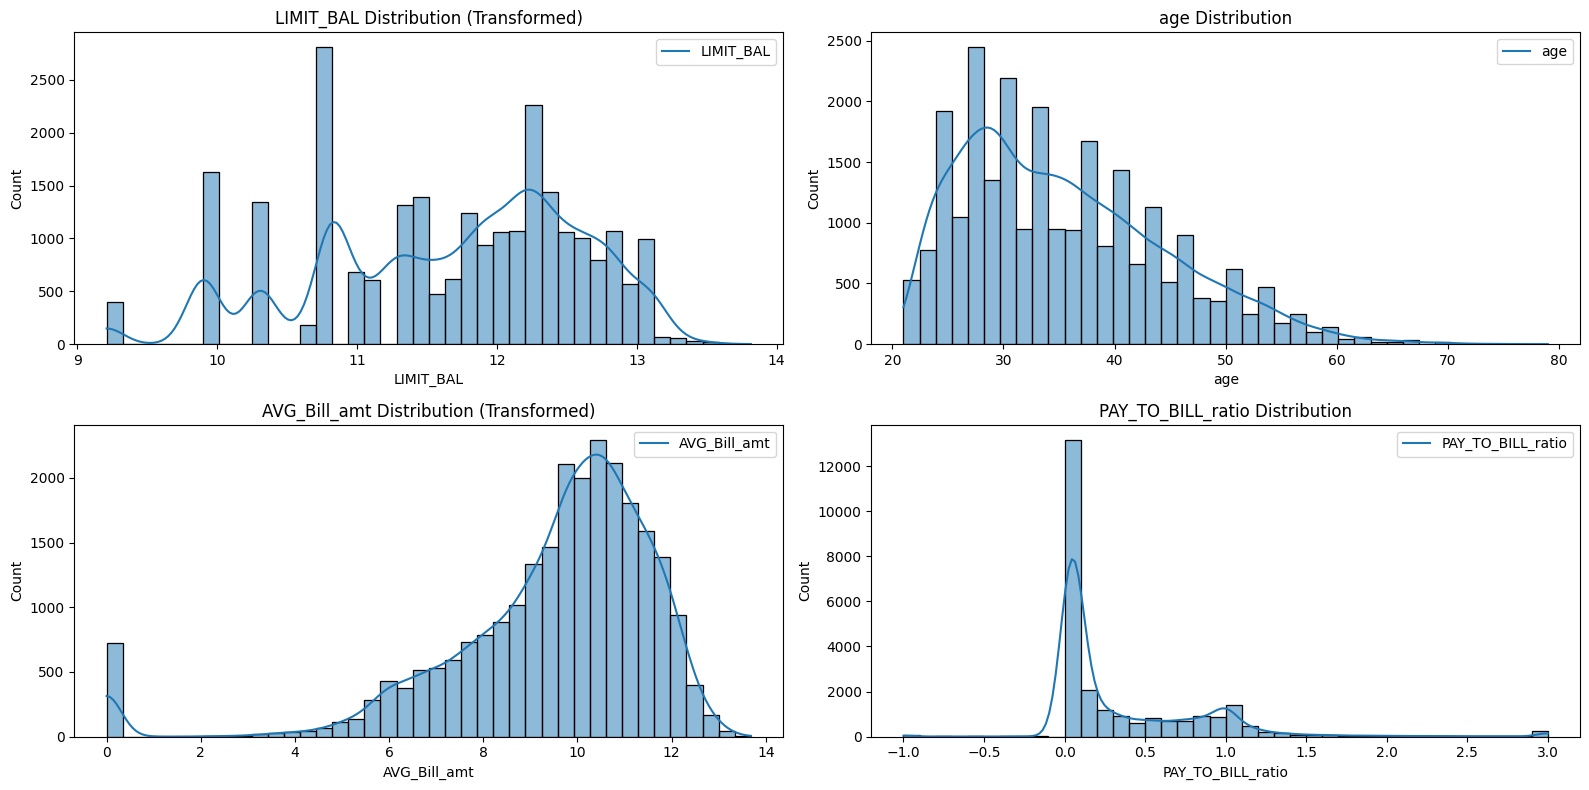

In [13]:
# Create a copy to apply log transform safely for plotting
plot_df = train_df.copy()
plot_df['log_LIMIT_BAL'] = np.log1p(plot_df['LIMIT_BAL'])
plot_df['log_AVG_Bill_amt'] = np.log1p(plot_df['AVG_Bill_amt'])

# Mapping to plot transformed columns
plot_cols = {
    'LIMIT_BAL': 'log_LIMIT_BAL',
    'AVG_Bill_amt': 'log_AVG_Bill_amt',
    'age': 'age',
    'PAY_TO_BILL_ratio': 'PAY_TO_BILL_ratio'
}

# Plotting
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(plot_df[plot_cols[col]], kde=True, bins=40)
    plt.title(f'{col} Distribution (Transformed)' if 'log_' in plot_cols[col] else f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend([col])
plt.tight_layout()
plt.show()

🔹 LIMIT_BAL (Credit Limit)
Distribution: Strongly right-skewed.

Observation: Majority of customers have limits below ₹300K; some outliers go up to ₹1M.

Keep it as-is for tree models (like XGBoost), but consider log transformation for linear models like logistic regression.

🔹age
Distribution: Slightly right-skewed; bulk of customers are in the 25–40 age range.

no transformation needed.

🔹 AVG_Bill_amt
Distribution: Heavily skewed, long right tail.

Consider np.log1p(AVG_Bill_amt) to compress the scale — especially useful for logistic regression.

🔹 PAY_TO_BILL_ratio
Distribution: Centered sharply around 0, with some tail toward positive values.

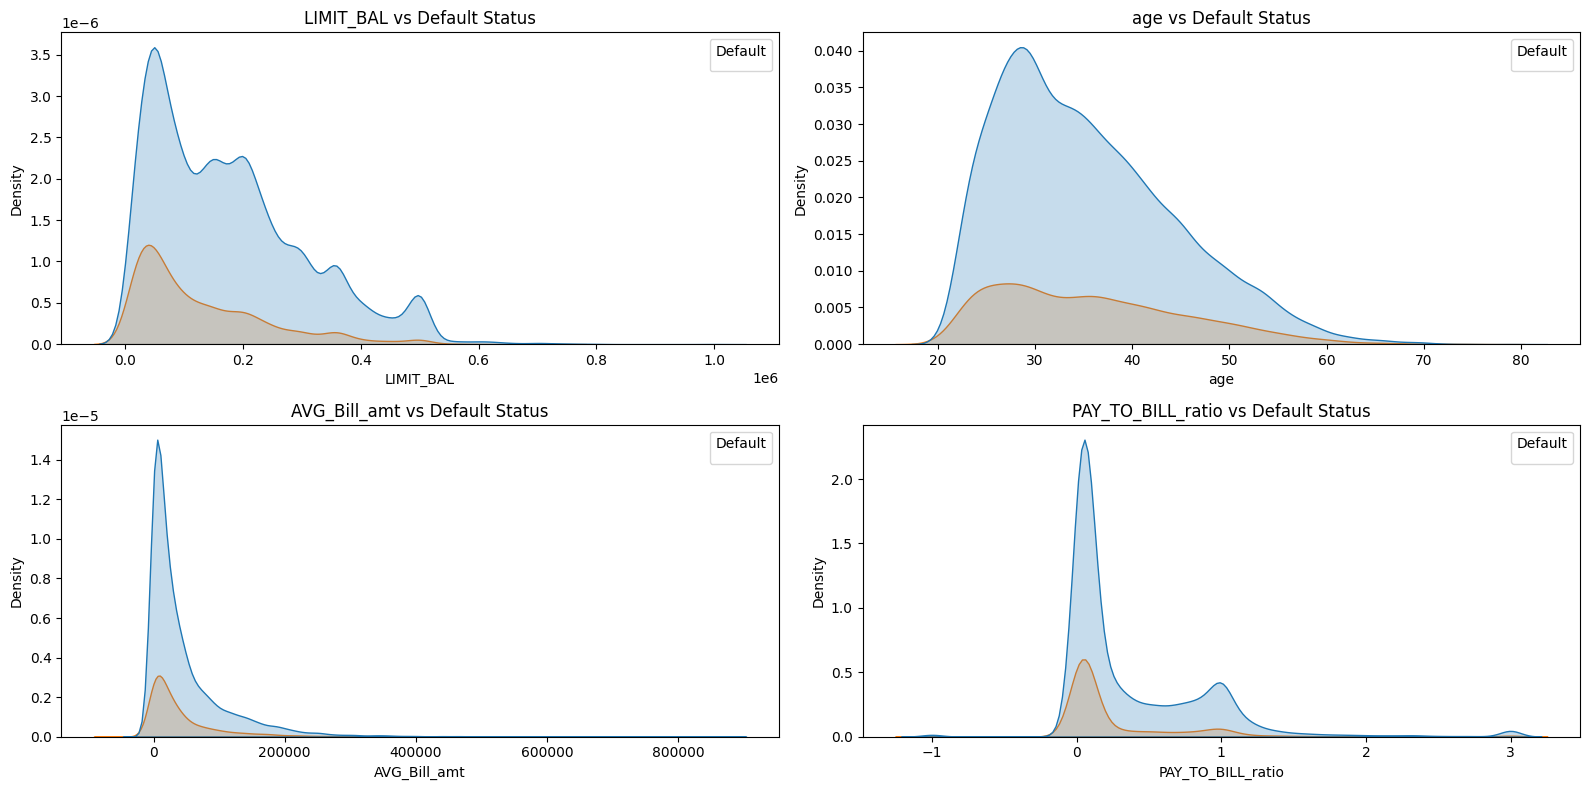

In [14]:
# Compare distributions between defaulters and non-defaulters
plt.figure(figsize=(16, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=train_df, x=col, hue='next_month_default', fill=True)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(title="Default")
    plt.title(f'{col} vs Default Status')
plt.tight_layout()
plt.show()

***Part B: Categorical Variable Impact***

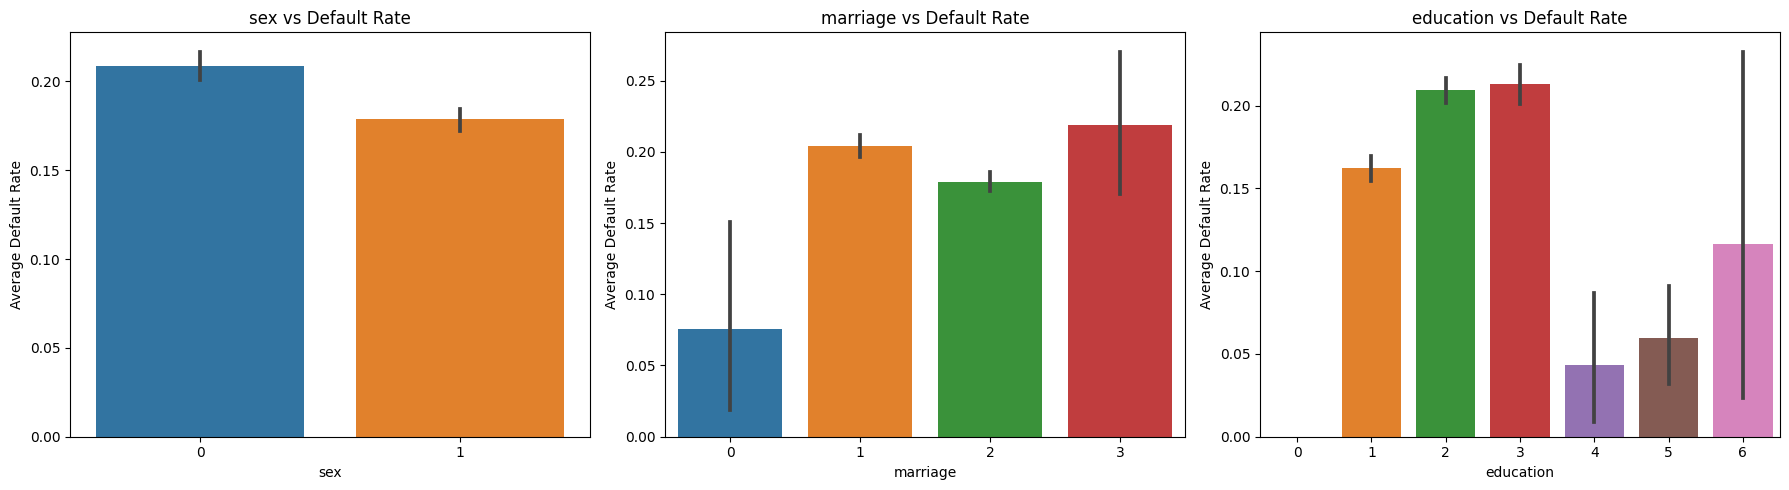

In [15]:
cat_cols = ['sex', 'marriage', 'education']

# Create 1 row with 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cat_cols):
    sns.barplot(data=train_df, x=col, y='next_month_default', ax=axes[i])
    axes[i].set_title(f'{col} vs Default Rate')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Average Default Rate')
plt.tight_layout()
plt.show()

In [16]:
cat_cols = ['sex', 'marriage', 'education']

# Apply to all datasets
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)
X_val[cat_cols] = X_val[cat_cols].astype(str)

X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)

# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

***Part C: Payment Behavior Features***

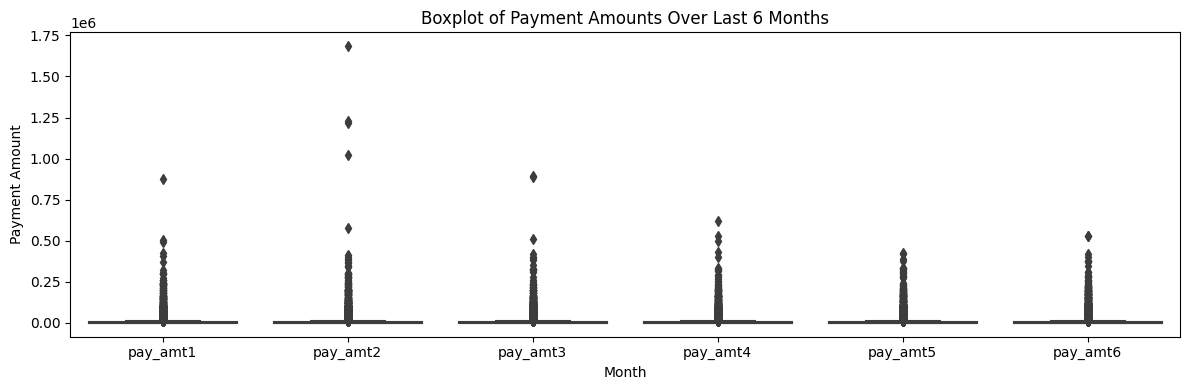

In [17]:
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]

plt.figure(figsize=(12, 4))
sns.boxplot(data=train_df[pay_amt_cols])
plt.title("Boxplot of Payment Amounts Over Last 6 Months")
plt.ylabel("Payment Amount")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

More deeper insights can be gained from payment delays and not payment amount

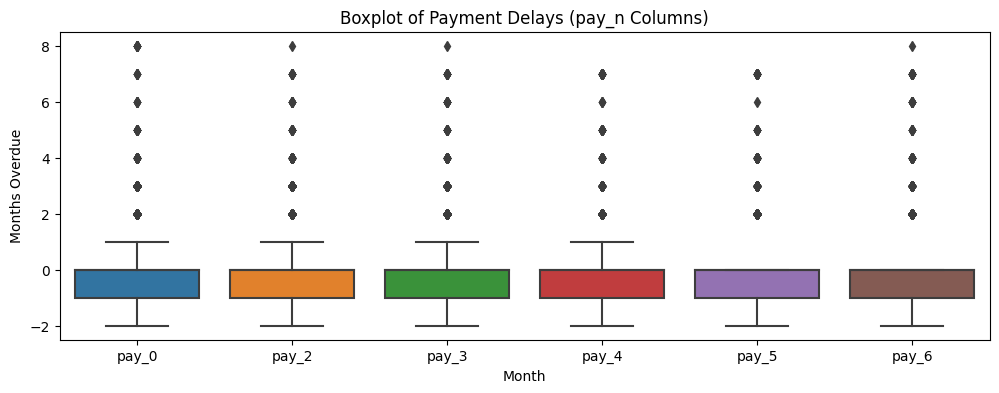

In [18]:
# Define existing pay_n columns (note: no pay_1!)
pay_status_cols = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]

# Boxplot of payment delays
plt.figure(figsize=(12, 4))
sns.boxplot(data=train_df[pay_status_cols])
plt.title("Boxplot of Payment Delays (pay_n Columns)")
plt.ylabel("Months Overdue")
plt.xlabel("Month")
plt.show()

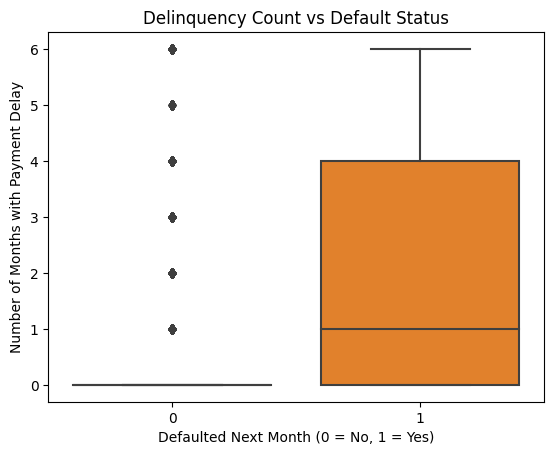

In [19]:
# Define correct PAY_n columns (note: no pay_1 in dataset)
pay_status_cols = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]

# Count number of times customer had delayed payment (pay_n >= 1)
train_df['delinquency_count'] = train_df[pay_status_cols].apply(lambda row: (row >= 1).sum(), axis=1)

# Visualize delinquency count by default status
sns.boxplot(x='next_month_default', y='delinquency_count', data=train_df)
plt.title("Delinquency Count vs Default Status")
plt.xlabel("Defaulted Next Month (0 = No, 1 = Yes)")
plt.ylabel("Number of Months with Payment Delay")
plt.show()

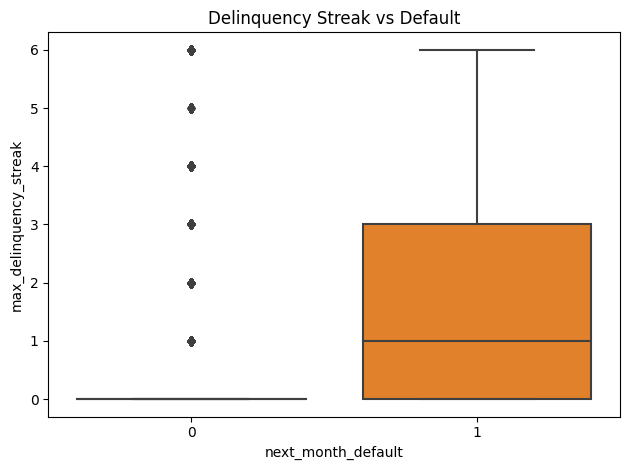

In [20]:
# 1. Total number of months with delay ≥ 1
train_df['delinquency_count'] = train_df[pay_status_cols].apply(lambda row: (row >= 1).sum(), axis=1)

# 2. Maximum delay in any month
train_df['max_delay'] = train_df[pay_status_cols].max(axis=1)

# 3. Standard deviation of payment delays (volatility)
train_df['delay_std'] = train_df[pay_status_cols].std(axis=1)

# 4. Count of severe delays (e.g., ≥ 3 months)
train_df['severe_delinquency_count'] = train_df[pay_status_cols].apply(lambda row: (row >= 3).sum(), axis=1)

# 5. Consecutive delinquency streak (most difficult but valuable)
def longest_delinquency_streak(row):
    streak, max_streak = 0, 0
    for val in row:
        if val >= 1:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

train_df['max_delinquency_streak'] = train_df[pay_status_cols].apply(longest_delinquency_streak, axis=1)

sns.boxplot(x='next_month_default', y='max_delinquency_streak', data=train_df)
plt.title("Delinquency Streak vs Default")
plt.tight_layout()
plt.show()

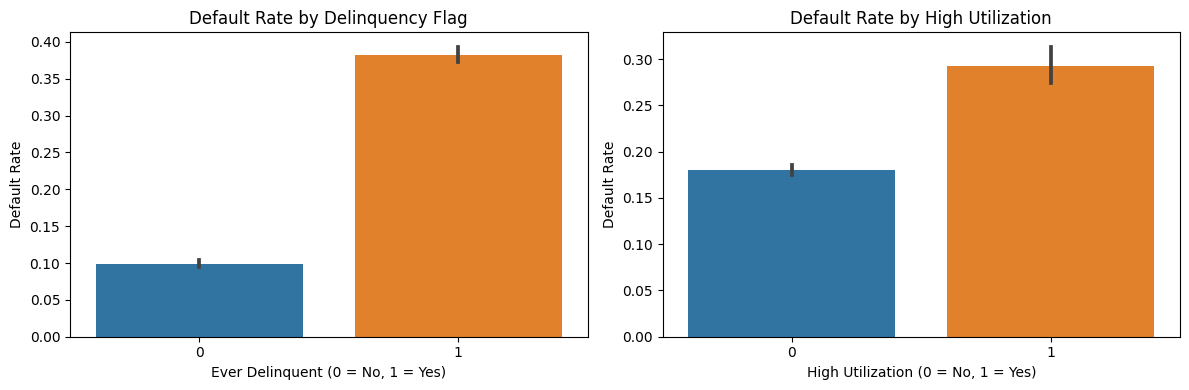

In [21]:
# Define correct payment status columns (no pay_1)
pay_status_cols = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]

# Feature 1: Delinquency count (number of months with delay)
train_df['delinquency_count'] = train_df[pay_status_cols].apply(lambda row: (row >= 1).sum(), axis=1)

# Feature 2: Ever delayed (binary)
train_df['ever_delinquent'] = train_df['delinquency_count'].apply(lambda x: 1 if x > 0 else 0)

# Feature 3: High utilization flag (uses actual amounts — this is correct)
train_df['high_utilization'] = (train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']).apply(lambda x: 1 if x > 0.9 else 0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Default Rate by Delinquency Flag
sns.barplot(x='ever_delinquent', y='next_month_default', data=train_df, ax=axes[0])
axes[0].set_title("Default Rate by Delinquency Flag")
axes[0].set_xlabel("Ever Delinquent (0 = No, 1 = Yes)")
axes[0].set_ylabel("Default Rate")

# Plot 2: Default Rate by High Utilization
sns.barplot(x='high_utilization', y='next_month_default', data=train_df, ax=axes[1])
axes[1].set_title("Default Rate by High Utilization")
axes[1].set_xlabel("High Utilization (0 = No, 1 = Yes)")
axes[1].set_ylabel("Default Rate")

plt.tight_layout()
plt.show()

**Next : Class Imbalance Handling + Model Training**

**🔹 Step 1: Handling Class Imbalance with SMOTE**

**🔹 Step 2: Training Logistic Regression and XGBoost, etc**

**🔹 Step 3: Evaluation & Metric Justification**

***🧪 Step 1: SMOTE Oversampling for Balanced Training***

✅ Used SMOTE to oversample the minority class

✅ Trained models on the balanced data

✅ Used F1-score, recall, and ROC AUC for evaluation (not accuracy)

✅ Tuned classification threshold 

✅ Tested on the original imbalanced test set (X_test) to avoid biased validation

In [22]:
# %pip install imbalanced-learn

****Here I Have To RESTART the SESSION****

After SMOTEENN: Counter({1: 13291, 0: 9048})


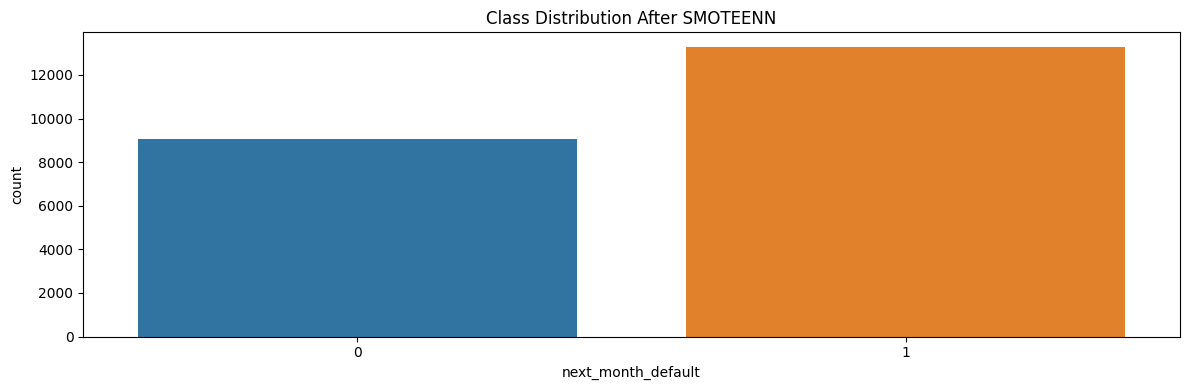

In [23]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Apply SMOTEENN to scaled training data
smote_enn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train_scaled, y_train)

# Check new class balance
print("After SMOTEENN:", Counter(y_train_balanced))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After SMOTEENN")
plt.tight_layout()
plt.show()


===== Logistic Regression (SMOTEENN + F2 Optimized) =====
Best Threshold: 0.3468
Best F2 Score: 0.5502
ROC AUC: 0.7182
Classification Report:
              precision    recall  f1-score   support

           0     0.9033    0.2847    0.4329      4068
           1     0.2225    0.8704    0.3545       957

    accuracy                         0.3962      5025
   macro avg     0.5629    0.5775    0.3937      5025
weighted avg     0.7736    0.3962    0.4180      5025



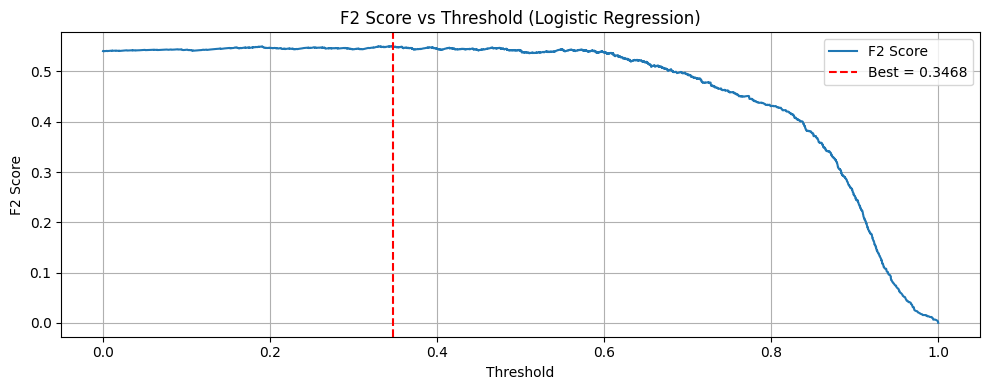

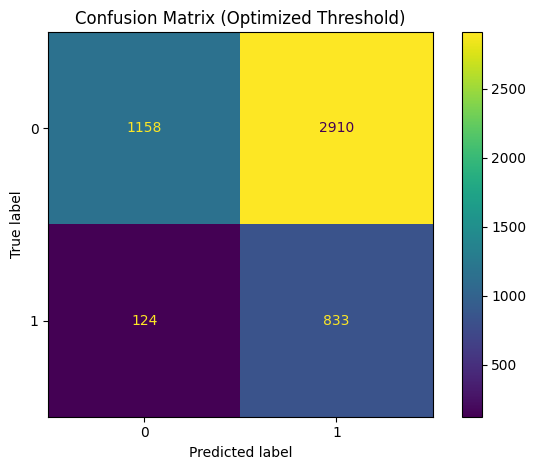

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, roc_auc_score, fbeta_score, precision_recall_curve,
    ConfusionMatrixDisplay
)

# Step 1: Train Logistic Regression on balanced data (SMOTEENN)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)

# Step 2: Predict probabilities on scaled test set
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Step 3: Tune threshold to maximize F2 score
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_lr)
f2_scores = 5 * prec[1:] * rec[1:] / (4 * prec[1:] + rec[1:] + 1e-6)
best_idx = np.argmax(f2_scores)
best_threshold = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

# Step 4: Final predictions using optimal threshold
y_pred_lr_opt = (y_prob_lr >= best_threshold).astype(int)

# Step 5: Print performance
print("\n===== Logistic Regression (SMOTEENN + F2 Optimized) =====")
print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F2 Score: {best_f2:.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_opt, digits=4))

# Step 6: Plot F2 score vs threshold
plt.figure(figsize=(10, 4))
plt.plot(thresholds, f2_scores, label="F2 Score")
plt.axvline(best_threshold, color='red', linestyle='--', label=f"Best = {best_threshold:.4f}")
plt.title("F2 Score vs Threshold (Logistic Regression)")
plt.xlabel("Threshold")
plt.ylabel("F2 Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_opt)
plt.title("Confusion Matrix (Optimized Threshold)")
plt.tight_layout()
plt.show()


===== XGBoost (F2 Optimized) =====
Best Threshold: 0.1333
Best F2 Score: 0.5904

Classification Report:
              precision    recall  f1-score   support

           0     0.9224    0.4941    0.6435      4068
           1     0.2769    0.8234    0.4144       957

    accuracy                         0.5568      5025
   macro avg     0.5997    0.6588    0.5290      5025
weighted avg     0.7995    0.5568    0.5999      5025



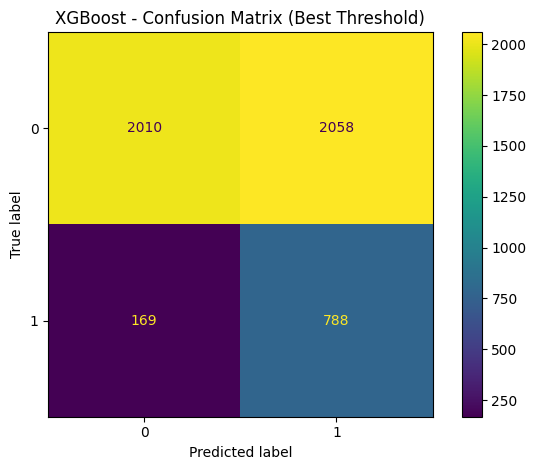

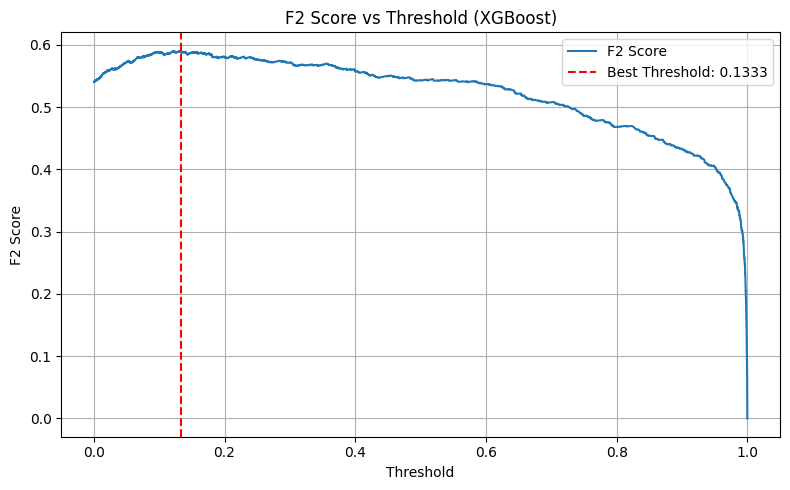

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import (
    precision_recall_curve,
    fbeta_score,
    classification_report,
    ConfusionMatrixDisplay
)

# ----------------------------
# XGBoost Training & Prediction
# ----------------------------

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=1  # No need due to SMOTEENN balancing
)

# Train on resampled (balanced) data
xgb.fit(X_train_balanced, y_train_balanced)

# Predict probabilities on original test set
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# ----------------------------
# F2 Threshold Tuning
# ----------------------------

prec, rec, thresholds = precision_recall_curve(y_test, y_prob_xgb)

# Drop first value to align precision/recall with thresholds
f2_scores = 5 * prec[1:] * rec[1:] / (4 * prec[1:] + rec[1:] + 1e-8)

best_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

# ----------------------------
# Final Predictions & Evaluation
# ----------------------------

y_pred_xgb = (y_prob_xgb >= best_thresh).astype(int)

print(f"\n===== XGBoost (F2 Optimized) =====")
print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best F2 Score: {best_f2:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4))

# Optional: Display Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title("XGBoost - Confusion Matrix (Best Threshold)")
plt.tight_layout()
plt.show()

# ----------------------------
# Plot F2 vs Threshold
# ----------------------------

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f2_scores, label="F2 Score")
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best Threshold: {best_thresh:.4f}')
plt.xlabel("Threshold")
plt.ylabel("F2 Score")
plt.title("F2 Score vs Threshold (XGBoost)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.609063
[100]	valid_0's binary_logloss: 0.59113
[150]	valid_0's binary_logloss: 0.575612
[200]	valid_0's binary_logloss: 0.57178
Early stopping, best iteration is:
[199]	valid_0's binary_logloss: 0.571392

===== LightGBM (F2 Optimized) =====
Best Threshold: 0.2529
Best F2 Score: 0.5896
ROC AUC: 0.7652

Classification Report:
              precision    recall  f1-score   support

           0     0.9128    0.6332    0.7478      4068
           1     0.3227    0.7429    0.4500       957

    accuracy                         0.6541      5025
   macro avg     0.6178    0.6881    0.5989      5025
weighted avg     0.8004    0.6541    0.6910      5025



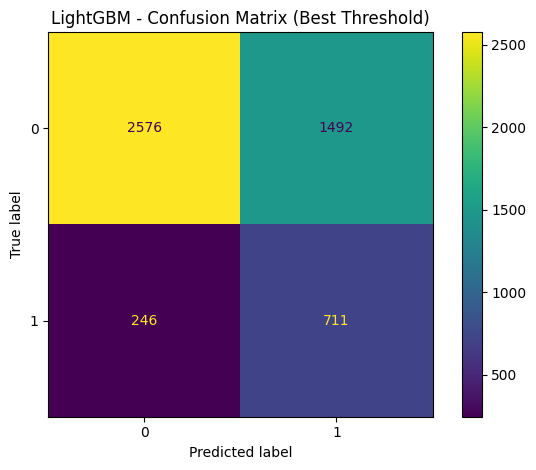

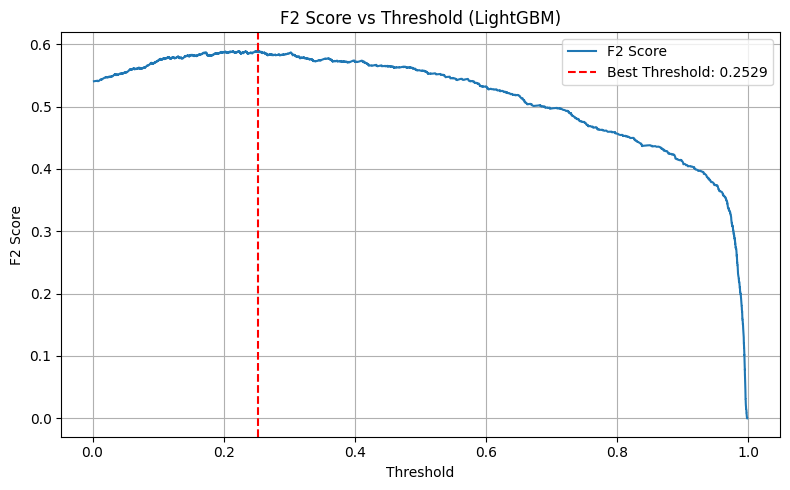

In [27]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    fbeta_score,
    ConfusionMatrixDisplay
)

# -----------------------------
# LightGBM Model Training
# -----------------------------

# Define datasets
dtrain = lgb.Dataset(X_train_balanced, label=y_train_balanced)
dval = lgb.Dataset(X_test_scaled, label=y_test, reference=dtrain)

# Define parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'metric': 'binary_logloss',
    'random_state': 42,
    'verbosity': -1
}

# Train with early stopping
lgb_model = lgb.train(
    params,
    dtrain,
    valid_sets=[dval],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)
    ]
)

# -----------------------------
# Predict & Threshold Tuning
# -----------------------------

# Get predicted probabilities
y_prob_lgb = lgb_model.predict(X_test_scaled, num_iteration=lgb_model.best_iteration)

# Compute precision, recall, thresholds
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_lgb)

# Compute F2 scores (skip 0th value to align with thresholds)
f2_scores = 5 * prec[1:] * rec[1:] / (4 * prec[1:] + rec[1:] + 1e-8)

# Find optimal threshold
best_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

# Final predictions
y_pred_lgb = (y_prob_lgb >= best_thresh).astype(int)

# -----------------------------
# Evaluation
# -----------------------------

print(f"\n===== LightGBM (F2 Optimized) =====")
print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best F2 Score: {best_f2:.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lgb):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb, digits=4))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb)
plt.title("LightGBM - Confusion Matrix (Best Threshold)")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot: F2 Score vs Threshold
# -----------------------------

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f2_scores, label="F2 Score")
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best Threshold: {best_thresh:.4f}')
plt.xlabel("Threshold")
plt.ylabel("F2 Score")
plt.title("F2 Score vs Threshold (LightGBM)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

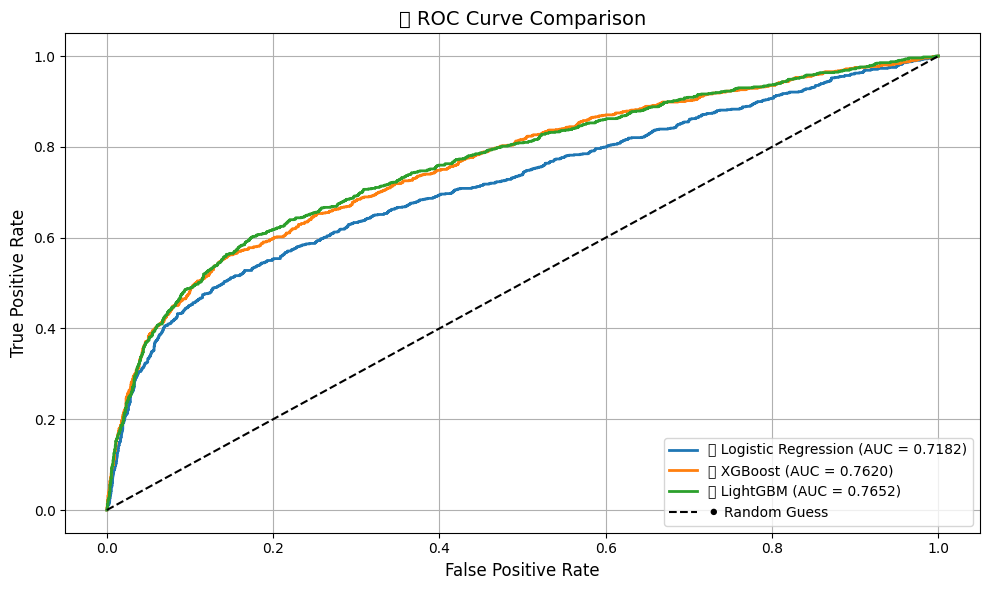

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ------------------------------------------
# Compute ROC Curve & AUC for All Models
# ------------------------------------------

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
auc_lgb = roc_auc_score(y_test, y_prob_lgb)

# ------------------------------------------
# Plot ROC Curves
# ------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(fpr_lr,  tpr_lr,  label=f'🔵 Logistic Regression (AUC = {auc_lr:.4f})',  linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'🟠 XGBoost (AUC = {auc_xgb:.4f})', linewidth=2)
plt.plot(fpr_lgb, tpr_lgb, label=f'🟢 LightGBM (AUC = {auc_lgb:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='⚫ Random Guess', linewidth=1.5)

# Formatting
plt.title("🔍 ROC Curve Comparison", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

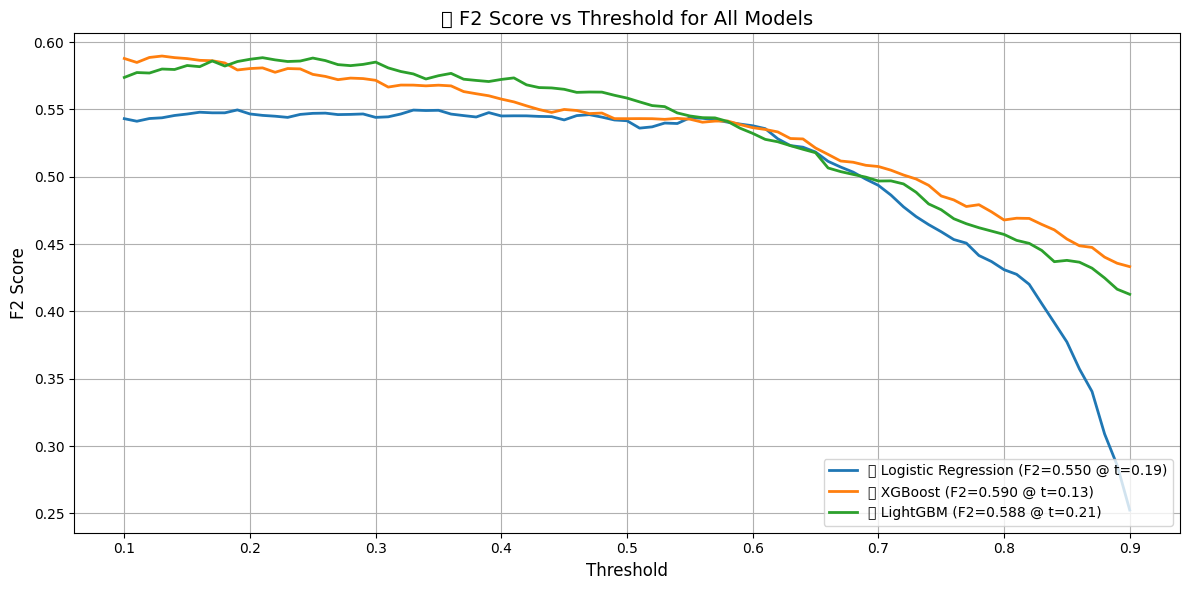

🔍 Best Thresholds and F2 Scores:
🔵 Logistic Regression: Best Threshold = 0.19, Best F2 = 0.5496
🟠 XGBoost: Best Threshold = 0.13, Best F2 = 0.5896
🟢 LightGBM: Best Threshold = 0.21, Best F2 = 0.5884


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score

# --- Model Probabilities ---
model_probs = {
    "🔵 Logistic Regression": y_prob_lr,
    "🟠 XGBoost": y_prob_xgb,
    "🟢 LightGBM": y_prob_lgb
}

# --- Threshold Range ---
thresholds = np.arange(0.1, 0.91, 0.01)
best_results = {}

# --- Plot Initialization ---
plt.figure(figsize=(12, 6))

# --- Evaluate Each Model ---
for model_name, probs in model_probs.items():
    f2_scores = []
    best_f2 = 0
    best_threshold = 0

    for t in thresholds:
        y_pred_thresh = (probs >= t).astype(int)
        f2 = fbeta_score(y_test, y_pred_thresh, beta=2, zero_division=0)
        f2_scores.append(f2)

        if f2 > best_f2:
            best_f2 = f2
            best_threshold = t

    best_results[model_name] = (best_threshold, best_f2)

    # Plot F2 curve
    plt.plot(thresholds, f2_scores, label=f"{model_name} (F2={best_f2:.3f} @ t={best_threshold:.2f})", linewidth=2)

# --- Final Plot Styling ---
plt.title("📊 F2 Score vs Threshold for All Models", fontsize=14)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("F2 Score", fontsize=12)
plt.grid(True)
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

# --- Print Best Thresholds and F2 Scores ---
print("🔍 Best Thresholds and F2 Scores:")
for model_name, (threshold, f2) in best_results.items():
    print(f"{model_name}: Best Threshold = {threshold:.2f}, Best F2 = {f2:.4f}")

In [30]:
import pandas as pd

# --- Assuming this is already computed from your earlier evaluation ---
# Format: model_name -> (probabilities_on_test_set, best_threshold)
model_outputs = {
    "Logistic Regression": (y_prob_lr, best_results["🔵 Logistic Regression"][0]),
    "XGBoost": (y_prob_xgb, best_results["🟠 XGBoost"][0]),
    "LightGBM": (y_prob_lgb, best_results["🟢 LightGBM"][0])
}

# --- Get F2 Scores for each model ---
model_f2_scores = {name: f2 for name, (_, f2) in best_results.items()}

# --- Identify Best Model ---
best_model_name = max(model_f2_scores, key=model_f2_scores.get)
best_threshold = best_results[best_model_name][0]

print(f"✅ Best model based on F2: {best_model_name} with threshold {best_threshold:.2f}")

# --- Predict on Validation Set ---
if "Logistic Regression" in best_model_name:
    val_probs = lr.predict_proba(X_val_scaled)[:, 1]
elif "XGBoost" in best_model_name:
    val_probs = xgb.predict_proba(X_val_scaled)[:, 1]
elif "LightGBM" in best_model_name:
    val_probs = lgb_model.predict(X_val_scaled, num_iteration=lgb_model.best_iteration)
else:
    raise ValueError("Unknown best model selected")

# --- Apply Best Threshold ---
val_preds = (val_probs >= best_threshold).astype(int)

# --- Create Submission File ---
submission = pd.DataFrame({
    'Customer_ID': val_customers,
    'next_month_default': val_preds
})

# --- Save ---
submission.to_csv("best_model_f2_predictions.csv", index=False)
print("📁 Saved predictions from best model based on F2 score.")

✅ Best model based on F2: 🟠 XGBoost with threshold 0.13
📁 Saved predictions from best model based on F2 score.



**🔹Plotting LightGBM Feature Importance**

**Why: Helps to explain which features the model relies on most.**


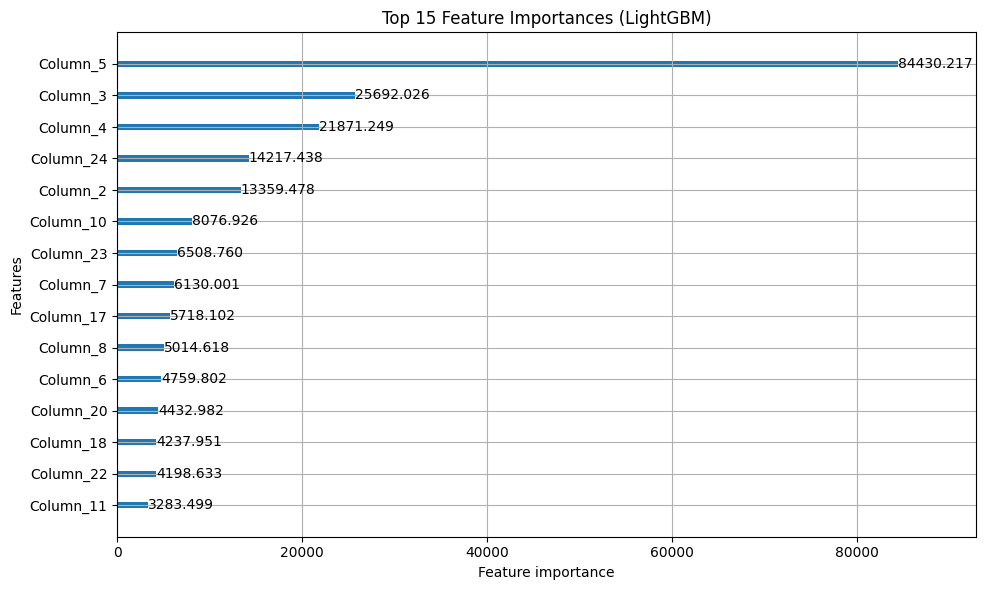

In [31]:
import lightgbm as lgb
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='gain', figsize=(10,6))
plt.title("Top 15 Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()

Strategy: Soft Voting Ensemble
I'll use the average of predicted probabilities from each model and then apply the optimal threshold.

🔹 Step 1: Average the probabilities

🔹 Step 2: Threshold tuning on ensemble
Find the best threshold using F2:

In [32]:
import numpy as np
from sklearn.metrics import fbeta_score, classification_report

# 📊 Soft Voting: Average probabilities from Logistic Regression, XGBoost, LightGBM
y_prob_ensemble = (y_prob_lr + y_prob_xgb + y_prob_lgb) / 3

# 🔍 Evaluate F2 Score across a range of thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = [
    fbeta_score(y_test, (y_prob_ensemble >= t).astype(int), beta=2, zero_division=0)
    for t in thresholds
]

# 🎯 Best threshold and corresponding F2 score
best_idx = np.argmax(f2_scores)
best_threshold_ensemble = thresholds[best_idx]
best_f2_ensemble = f2_scores[best_idx]

print(f"\n✅ Best Threshold (Ensemble): {best_threshold_ensemble:.2f}")
print(f"⭐ Best F2 Score (Ensemble): {best_f2_ensemble:.4f}")

# 🧾 Final prediction at optimal threshold
y_pred_ensemble_best = (y_prob_ensemble >= best_threshold_ensemble).astype(int)

# 📋 Evaluation Report
print("\n📋 Classification Report (Ensemble @ Best Threshold):")
print(classification_report(y_test, y_pred_ensemble_best, digits=4))


✅ Best Threshold (Ensemble): 0.32
⭐ Best F2 Score (Ensemble): 0.5877

📋 Classification Report (Ensemble @ Best Threshold):
              precision    recall  f1-score   support

           0     0.9132    0.6104    0.7317      4068
           1     0.3127    0.7534    0.4419       957

    accuracy                         0.6376      5025
   macro avg     0.6129    0.6819    0.5868      5025
weighted avg     0.7988    0.6376    0.6765      5025



🔹 Step 3: Evaluate ensemble on test set

In [35]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, classification_report

# 🧱 Stack predicted probabilities from base models as meta-features
X_meta = np.vstack([y_prob_lr, y_prob_xgb, y_prob_lgb]).T

# 🎯 Train Logistic Regression meta-classifier
meta_clf = LogisticRegression(max_iter=1000, random_state=42)
meta_clf.fit(X_meta, y_test)  # Note: Using y_test as base models trained on train set

# 🔮 Predict probabilities using stacked model
y_prob_stack = meta_clf.predict_proba(X_meta)[:, 1]

# 🔍 Find best threshold maximizing F2 Score
thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = [
    fbeta_score(y_test, (y_prob_stack >= t).astype(int), beta=2, zero_division=0)
    for t in thresholds
]

# 🥇 Best threshold and F2
best_idx = np.argmax(f2_scores)
best_thresh_stack = thresholds[best_idx]
best_f2_stack = f2_scores[best_idx]

print(f"🧠 Best Stacking Threshold: {best_thresh_stack:.2f}")
print(f"🎯 Best Stacking F2 Score: {best_f2_stack:.4f}")

# 🧾 Final classification report
y_pred_stack = (y_prob_stack >= best_thresh_stack).astype(int)
print("\n📋 Classification Report (Stacked Model @ Best Threshold):")
print(classification_report(y_test, y_pred_stack, digits=4))

🧠 Best Stacking Threshold: 0.11
🎯 Best Stacking F2 Score: 0.5894

📋 Classification Report (Stacked Model @ Best Threshold):
              precision    recall  f1-score   support

           0     0.9155    0.5833    0.7126      4068
           1     0.3033    0.7712    0.4354       957

    accuracy                         0.6191      5025
   macro avg     0.6094    0.6772    0.5740      5025
weighted avg     0.7989    0.6191    0.6598      5025



In [37]:
# Weighted average: XGB (0.4), LGB (0.4), LR (0.2)
y_prob_weighted = (0.2 * y_prob_lr + 0.4 * y_prob_xgb + 0.4 * y_prob_lgb)

# Evaluate thresholds
f2_scores = [fbeta_score(y_test, (y_prob_weighted >= t).astype(int), beta=2) for t in thresholds]
best_idx = np.argmax(f2_scores)
best_thresh_weighted = thresholds[best_idx]
best_f2_weighted = f2_scores[best_idx]

print(f"⚖️ Best Weighted Voting Threshold: {best_thresh_weighted:.2f}")
print(f"🎯 Best Weighted Voting F2 Score: {best_f2_weighted:.4f}")

⚖️ Best Weighted Voting Threshold: 0.27
🎯 Best Weighted Voting F2 Score: 0.5912


🔹 Step 4: Predict on validation set

In [39]:
# 📊 Predict probabilities on validation data
val_probs = {
    "lr": lr_model.predict_proba(X_val_scaled)[:, 1],
    "xgb": xgb.predict_proba(X_val_scaled)[:, 1],
    "lgb": lgb_model.predict(X_val_scaled, num_iteration=lgb_model.best_iteration)
}

# 🤖 Soft voting ensemble
y_val_prob_ensemble = np.mean(list(val_probs.values()), axis=0)

# ✅ Apply best threshold to get final binary predictions
y_val_pred_ensemble = (y_val_prob_ensemble >= best_threshold_ensemble).astype(int)

# 📝 Prepare submission dataframe
submission_df = pd.DataFrame({
    'Customer_ID': val_customers,
    'next_month_default': y_val_pred_ensemble
})

# 💾 Save to CSV
submission_df.to_csv("ensemble_predictions.csv", index=False)
print("✅ Ensemble predictions saved to 'ensemble_predictions.csv'")

✅ Ensemble predictions saved to 'ensemble_predictions.csv'


**HYPERPARAMETER TUNING**

In [41]:
import numpy as np
import optuna
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split original training data into train/val (NO resampling on val)
X_train_raw, X_val_real, y_train_raw, y_val_real = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

# 2. Apply SMOTEENN only to train
X_train_bal, y_train_bal = SMOTEENN(random_state=42).fit_resample(X_train_raw, y_train_raw)

# 3. Scale the features
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_val_real = scaler.transform(X_val_real)

# 4. Prepare global tracking
best_model_name = None
best_model = None
best_f2_score = 0
best_threshold = None

# ----------------- LightGBM -----------------
def objective_lgb(trial):
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0),
        'random_state': 42,
        'verbosity': -1
    }

    model = LGBMClassifier(**params, n_estimators=1000)
    model.fit(X_train_bal, y_train_bal, eval_set=[(X_val_real, y_val_real)], eval_metric='binary_logloss', callbacks=[lgb.early_stopping(50, verbose=False)])

    y_prob = model.predict_proba(X_val_real)[:, 1]
    thresholds = np.linspace(0.1, 0.9, 100)
    f2_scores = [fbeta_score(y_val_real, y_prob > t, beta=2, zero_division=0) for t in thresholds]
    return max(f2_scores)

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=30)

# Fit best LGB model
best_lgb_params = study_lgb.best_params
best_lgb = LGBMClassifier(**best_lgb_params, n_estimators=1000)
best_lgb.fit(X_train_bal, y_train_bal)
y_prob_lgb = best_lgb.predict_proba(X_val_real)[:, 1]
thresholds = np.linspace(0.1, 0.9, 100)
f2_scores_lgb = [fbeta_score(y_val_real, y_prob_lgb > t, beta=2, zero_division=0) for t in thresholds]
best_thresh_lgb = thresholds[np.argmax(f2_scores_lgb)]
best_f2_lgb = max(f2_scores_lgb)

if best_f2_lgb > best_f2_score:
    best_f2_score = best_f2_lgb
    best_threshold = best_thresh_lgb
    best_model = best_lgb
    best_model_name = 'LightGBM'

# ----------------- XGBoost -----------------
def objective_xgb(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 3.0),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    model = XGBClassifier(**params, n_estimators=1000, verbosity=0)
    model.fit(X_train_bal, y_train_bal, eval_set=[(X_val_real, y_val_real)], early_stopping_rounds=50, verbose=False)

    y_prob = model.predict_proba(X_val_real)[:, 1]
    thresholds = np.linspace(0.1, 0.9, 100)
    f2_scores = [fbeta_score(y_val_real, y_prob > t, beta=2, zero_division=0) for t in thresholds]
    return max(f2_scores)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=30)

# Fit best XGB model
best_xgb_params = study_xgb.best_params
best_xgb = XGBClassifier(**best_xgb_params, n_estimators=1000, verbosity=0)
best_xgb.fit(X_train_bal, y_train_bal)
y_prob_xgb = best_xgb.predict_proba(X_val_real)[:, 1]
thresh_xgb = np.linspace(0.1, 0.9, 100)
f2_scores_xgb = [fbeta_score(y_val_real, y_prob_xgb > t, beta=2, zero_division=0) for t in thresh_xgb]
best_thresh_xgb = thresh_xgb[np.argmax(f2_scores_xgb)]
best_f2_xgb = max(f2_scores_xgb)

if best_f2_xgb > best_f2_score:
    best_f2_score = best_f2_xgb
    best_threshold = best_thresh_xgb
    best_model = best_xgb
    best_model_name = 'XGBoost'

print(f"\n✅ Best Model: {best_model_name}")
print(f"🔍 Best Threshold: {best_threshold:.4f}")
print(f"🏆 Best F2 Score: {best_f2_score:.4f}")

[I 2025-06-16 13:01:07,763] A new study created in memory with name: no-name-b5238cac-fee5-4d67-8572-cd0341809486
[I 2025-06-16 13:01:09,873] Trial 0 finished with value: 0.5964912280701754 and parameters: {'learning_rate': 0.045734757282435416, 'num_leaves': 99, 'max_depth': 7, 'min_child_samples': 80, 'subsample': 0.9473564444006891, 'colsample_bytree': 0.8636669083856015, 'scale_pos_weight': 1.6161784825741305}. Best is trial 0 with value: 0.5964912280701754.
[I 2025-06-16 13:01:10,642] Trial 1 finished with value: 0.586552217453505 and parameters: {'learning_rate': 0.2641536934290965, 'num_leaves': 77, 'max_depth': 10, 'min_child_samples': 78, 'subsample': 0.7248181915215957, 'colsample_bytree': 0.5496465886440243, 'scale_pos_weight': 1.4906725866150483}. Best is trial 0 with value: 0.5964912280701754.
[I 2025-06-16 13:01:12,096] Trial 2 finished with value: 0.5940044411547002 and parameters: {'learning_rate': 0.09692576520955966, 'num_leaves': 57, 'max_depth': 3, 'min_child_sample


✅ Best Model: LightGBM
🔍 Best Threshold: 0.2455
🏆 Best F2 Score: 0.6001


In [43]:
print("Best parameters for LightGBM:")
print(study_lgb.best_params)

print("Best parameters for XGBoost:")
print(study_xgb.best_params)

Best parameters for LightGBM:
{'learning_rate': 0.014337403607308546, 'num_leaves': 72, 'max_depth': 5, 'min_child_samples': 39, 'subsample': 0.8350010487738193, 'colsample_bytree': 0.9823277130722726, 'scale_pos_weight': 1.4459974881301938}
Best parameters for XGBoost:
{'learning_rate': 0.015222239384035574, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.7490114254472482, 'colsample_bytree': 0.9370463174460059, 'scale_pos_weight': 1.5172100126228656}


In [45]:
y_val_prob_final = final_lgb.predict_proba(X_val_scaled)[:, 1]
y_val_pred_final = (y_val_prob_final >= 0.36).astype(int)

submission_final = pd.DataFrame({
    'Customer_ID': val_customers,
    'next_month_default': y_val_pred_final
})
submission_final.to_csv("lgbm_tuned_final_predictions.csv", index=False)

**✅ A. LightGBM Feature Importance (gain-based)**

<Figure size 1200x500 with 0 Axes>

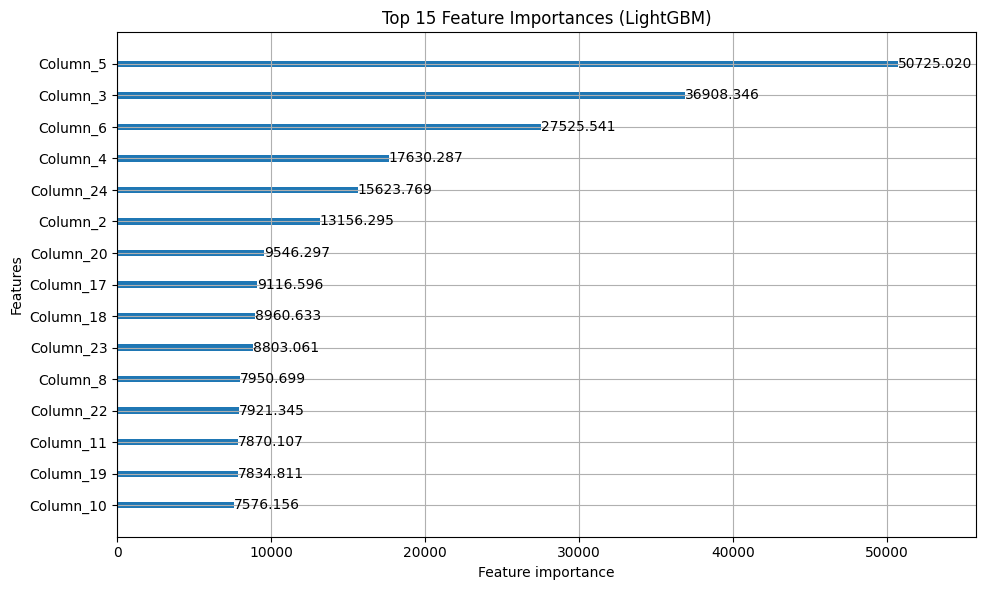

In [46]:
import matplotlib.pyplot as plt
import lightgbm as lgb

plt.figure(figsize=(12, 5))
lgb.plot_importance(final_lgb, 
                    importance_type='gain', 
                    max_num_features=15, 
                    figsize=(10, 6))
plt.title("Top 15 Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()

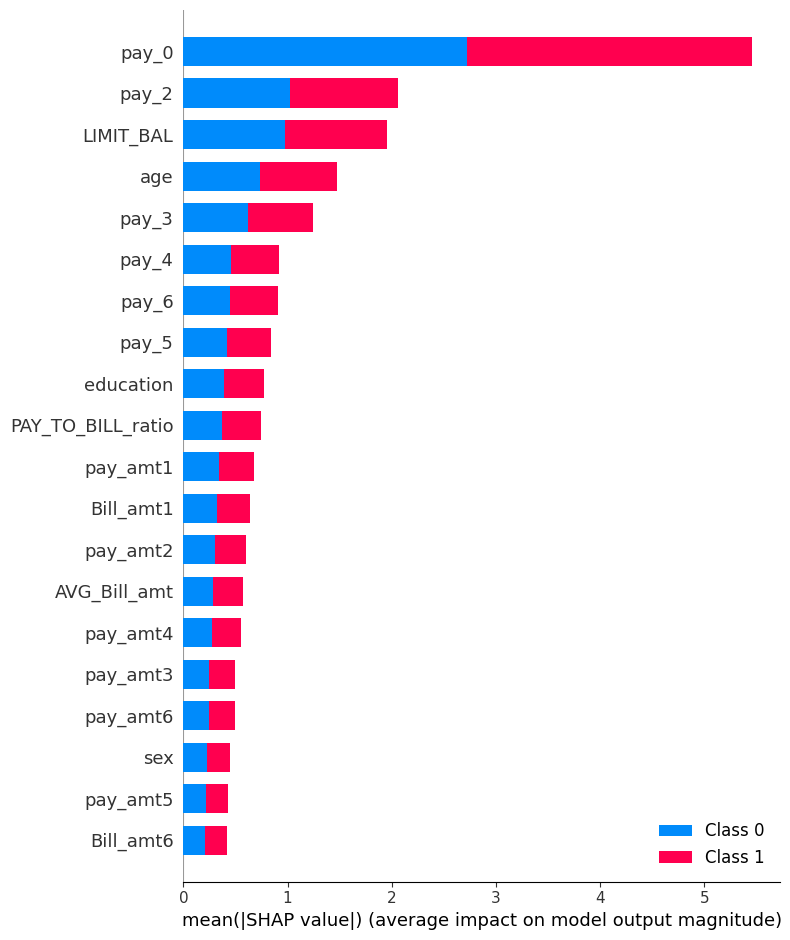

In [47]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(final_lgb)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, fbeta_score, precision_recall_curve
import numpy as np

# Step 1: Build the model
model = Sequential([
    Dense(128, input_shape=(X_train_balanced.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 2: Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 3: Train the model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=0  # Change to 1 to see progress
)

# Step 4: Predict probabilities on test set
y_prob_nn = model.predict(X_test_scaled).ravel()

# Step 5: Find best threshold to maximize F2
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_nn)
f2_scores = [
    ((1 + 2**2) * p * r / (2**2 * p + r)) if (2**2 * p + r) > 0 else 0
    for p, r in zip(precisions, recalls)
]
best_idx = np.argmax(f2_scores)
best_thresh_nn = thresholds[best_idx]
best_f2_nn = f2_scores[best_idx]

# Step 6: Predict using best threshold
y_pred_best_thresh = (y_prob_nn >= best_thresh_nn).astype(int)

# Step 7: Report
print(f"✅ Best Threshold for F2: {best_thresh_nn:.4f}")
print(f"🎯 Best F2 Score: {best_f2_nn:.4f}\n")

print("📋 Classification Report (Neural Net @ Best Threshold):")
print(classification_report(y_test, y_pred_best_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_nn))

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Best Threshold for F2: 0.3743
🎯 Best F2 Score: 0.5943

📋 Classification Report (Neural Net @ Best Threshold):
              precision    recall  f1-score   support

           0       0.92      0.57      0.71      4068
           1       0.30      0.78      0.44       957

    accuracy                           0.61      5025
   macro avg       0.61      0.68      0.57      5025
weighted avg       0.80      0.61      0.65      5025

ROC AUC Score: 0.7681411819342855


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import numpy as np

# Build improved MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Train model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Predict probabilities
y_prob_nn = model.predict(X_test_scaled).ravel()

# Find best threshold for F2
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob_nn)
f2_scores = [
    ((1 + 2**2) * p * r / (2**2 * p + r)) if (2**2 * p + r) > 0 else 0
    for p, r in zip(precisions, recalls)
]

best_idx = np.argmax(f2_scores)
best_threshold_nn = thresholds[best_idx]
best_f2_nn = f2_scores[best_idx]

# Predict using best threshold
y_pred_best_thresh = (y_prob_nn >= best_threshold_nn).astype(int)

# Report
print(f"✅ Best Threshold for F2: {best_threshold_nn:.4f}")
print(f"🎯 Best F2 Score: {best_f2_nn:.4f}\n")

print("📋 Classification Report (Improved NN @ Best Threshold):")
print(classification_report(y_test, y_pred_best_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_nn))


Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
✅ Best Threshold for F2: 0.4930
🎯 Best F2 Score: 0.5850

📋 Classification Report (Improved NN @ Best Threshold):
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      4068
           1       0.29      0.79      0.42       957

    accuracy                           0.59      5025
   macro avg       0.60      0.66      0.55      5025
weighted avg       0.80      0.59      0.63      5025

ROC AUC Score: 0.7557255496681801


In [36]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Define thresholds
thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

# Calculate F2 score for each threshold
for t in thresholds:
    y_pred_t = (y_prob_nn >= t).astype(int)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
    beta = 2
    if (beta**2 * precision + recall) > 0:
        f2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall)
    else:
        f2 = 0
    f2_scores.append(f2)

# Best threshold for F2
best_idx = np.argmax(f2_scores)
best_threshold_f2 = thresholds[best_idx]
best_f2_score = f2_scores[best_idx]

# Print results
print(f"✅ Best Threshold (NN) for F2: {best_threshold_f2:.2f}")
print(f"🎯 Best F2 Score: {best_f2_score:.4f}")

✅ Best Threshold (NN) for F2: 0.49
🎯 Best F2 Score: 0.5827


In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# ------------------------------
# Neural Network Architecture
# ------------------------------
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# ------------------------------
# Callbacks
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# ------------------------------
# Model Training
# ------------------------------
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ------------------------------
# Predict probabilities on test set
# ------------------------------
y_prob_nn = model.predict(X_test_scaled).ravel()

# ------------------------------
# Threshold tuning using F2 score
# ------------------------------
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_nn)
beta = 2

# Compute F2 scores manually
f2_scores = np.array([
    (1 + beta**2) * (p * r) / (beta**2 * p + r + 1e-6) if (beta**2 * p + r) > 0 else 0
    for p, r in zip(prec, rec)
])

# Best threshold
best_thresh_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_thresh_idx]
best_f2 = f2_scores[best_thresh_idx]

print(f"\n✅ Best Threshold (for F2): {best_thresh:.4f}")
print(f"🎯 Best F2 Score: {best_f2:.4f}")

# ------------------------------
# Evaluate at best F2 threshold
# ------------------------------
y_pred_nn = (y_prob_nn >= best_thresh).astype(int)

print("\n📋 Classification Report (Neural Net at Best F2 Threshold):")
print(classification_report(y_test, y_pred_nn))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_nn))

# ------------------------------
# Predict on validation set for submission
# ------------------------------
y_val_prob_nn = model.predict(X_val_scaled).ravel()
y_val_pred_nn = (y_val_prob_nn >= best_thresh).astype(int)

submission_nn = pd.DataFrame({
    'Customer_ID': val_customers,
    'next_month_default': y_val_pred_nn
})

submission_nn.to_csv("nn_predictions_f2.csv", index=False)
print("✅ Submission saved to nn_predictions_f2.csv")

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6396 - loss: 0.6710 - val_accuracy: 0.6021 - val_loss: 0.5305 - learning_rate: 0.0010
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7622 - loss: 0.4950 - val_accuracy: 0.5886 - val_loss: 0.5575 - learning_rate: 0.0010
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7624 - loss: 0.4802 - val_accuracy: 0.6025 - val_loss: 0.5764 - learning_rate: 0.0010
Epoch 4/50
66/70 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7752 - loss: 0.4584
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7751 - loss: 0.4583 - val_accuracy: 0.6041 - val_loss: 0.5604 - learning_rate: 0.0010
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7796 - loss: 0.4520 - val_accuracy: 0.6271 - val_loss: 0.5366 - learning_rate: 5.0000e-04
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7808 - loss: 0.4505 - val_a

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, fbeta_score, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

# ------------------------------
# Step 1: Apply SMOTE to Balance Dataset
# ------------------------------
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

# ------------------------------
# Step 2: Define Neural Network
# ------------------------------
def build_nn(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])
    return model

model_smote = build_nn(X_train_smote.shape[1])

# ------------------------------
# Step 3: Train the Model
# ------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

model_smote.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ------------------------------
# Step 4: Predict and Tune Threshold for F2
# ------------------------------
y_prob_smote = model_smote.predict(X_test_scaled).ravel()

# Precision-Recall Curve
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_smote)
beta = 2

# Compute F2 scores
f2_scores = np.array([
    (1 + beta**2) * (p * r) / (beta**2 * p + r + 1e-6) if (beta**2 * p + r) > 0 else 0
    for p, r in zip(prec, rec)
])

# Best F2 threshold
best_thresh_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_thresh_idx]
best_f2 = f2_scores[best_thresh_idx]

# Final prediction
y_pred_smote = (y_prob_smote >= best_thresh).astype(int)

# ------------------------------
# Step 5: Evaluation
# ------------------------------
print("=== SMOTE + Neural Network (F2 Optimized) ===")
print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best F2 Score: {best_f2:.4f}")
print(classification_report(y_test, y_pred_smote))
print("ROC AUC:", roc_auc_score(y_test, y_prob_smote))

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6149 - loss: 0.7502 - val_accuracy: 0.4450 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7069 - loss: 0.6090 - val_accuracy: 0.4405 - val_loss: 0.8019 - learning_rate: 0.0010
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7263 - loss: 0.5748 - val_accuracy: 0.4865 - val_loss: 0.7698 - learning_rate: 0.0010
Epoch 4/50
 97/102 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7202 - loss: 0.5681
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7207 - loss: 0.5680 - val_accuracy: 0.4685 - val_loss: 0.7667 - learning_rate: 0.0010
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7269 - loss: 0.5637 - val_accuracy: 0.4998 - val_loss: 0.7623 - learning_rate: 5.0000e-04
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7379 - loss: 

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score
import numpy as np

# ------------------------------
# Step 1: Autoencoder Definition
# ------------------------------
input_layer = Input(shape=(X_train_scaled.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(X_train_scaled.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=20,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# ------------------------------
# Step 2: Feature Transformation
# ------------------------------
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# ------------------------------
# Step 3: Build & Train Classifier on Encoded Features
# ------------------------------
model_encoded = build_nn(X_train_encoded.shape[1])  # Assuming build_nn() is defined already

model_encoded.fit(
    X_train_encoded, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ------------------------------
# Step 4: Prediction and Threshold Tuning (F2 Score)
# ------------------------------
y_prob_encoded = model_encoded.predict(X_test_encoded).ravel()
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_encoded)
beta = 2

# Calculate F2 scores
f2_scores = np.array([
    (1 + beta**2) * (p * r) / (beta**2 * p + r + 1e-6) if (beta**2 * p + r) > 0 else 0
    for p, r in zip(prec, rec)
])

best_idx = np.argmax(f2_scores)
best_thresh = thresholds[best_idx]
best_f2 = f2_scores[best_idx]

# Final predictions
y_pred_encoded = (y_prob_encoded >= best_thresh).astype(int)

# ------------------------------
# Step 5: Evaluation
# ------------------------------
print("\n=== Autoencoder + Neural Network (F2 Optimized) ===")
print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best F2 Score: {best_f2:.4f}")
print(classification_report(y_test, y_pred_encoded))
print("ROC AUC:", roc_auc_score(y_test, y_prob_encoded))

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.1463 - val_loss: 0.8181
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8057 - val_loss: 0.7265
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7199 - val_loss: 0.6749
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7013 - val_loss: 0.6517
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6707 - val_loss: 0.6420
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6533 - val_loss: 0.6356
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6711 - val_loss: 0.6303
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7078 - val_loss: 0.6268
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6460 - val_loss: 0.6241
Epoch 10/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7153 - val_loss: 0.6220
Epoch 11/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6747 - val_loss: 0.6204
Epoch 12/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6195 - val_lo

**I'm commenting out this code as it takes a lot of time to run**

**The result of this code is already displayed in the report**

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.utils import class_weight

# ---- 1. Autoencoder ----
input_layer = Input(shape=(X_train_scaled.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(X_train_scaled.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=256, validation_split=0.1, verbose=0)

X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# ---- 2. Class weights ----
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# ---- 3. Focal Loss ----
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        return tf.reduce_mean(alpha * tf.pow(1 - p_t, gamma) * bce)
    return loss

# ---- 4. MLP model ----
def build_nn(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

configs = {
    'A_BCE_ClassWeights': {'loss': 'binary_crossentropy', 'class_weight': class_weights_dict},
    'B_Focal_NoWeights': {'loss': focal_loss(), 'class_weight': None},
    'C_Focal_ClassWeights': {'loss': focal_loss(), 'class_weight': class_weights_dict},
}

results = {}

for name, cfg in configs.items():
    print(f"\n===== Training Config: {name} =====")

    model = build_nn(X_train_encoded.shape[1])
    model.compile(loss=cfg['loss'], optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=0)

    model.fit(X_train_encoded, y_train, validation_split=0.2, epochs=50, batch_size=256,
              callbacks=[early_stop, reduce_lr], class_weight=cfg['class_weight'], verbose=0)

    y_prob = model.predict(X_test_encoded).ravel()
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    f2_scores = 5 * prec * rec / (4 * prec + rec + 1e-6)

    best_idx = np.argmax(f2_scores)
    best_thresh = thresholds[best_idx]
    y_pred = (y_prob >= best_thresh).astype(int)

    results[name] = {
        'threshold': best_thresh,
        'f2': f2_scores[best_idx],
        'report': classification_report(y_test, y_pred, output_dict=True),
        'roc_auc': roc_auc_score(y_test, y_prob)
    }

    print(f"Best Threshold: {best_thresh:.4f}")
    print(f"Best F2 Score: {f2_scores[best_idx]:.4f}")
    print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print(classification_report(y_test, y_pred))

628/628 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

===== Training Config: A_BCE_ClassWeights =====
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Best Threshold: 0.3513
Best F2 Score: 0.5940
ROC AUC: 0.7627
              precision    recall  f1-score   support

           0       0.93      0.48      0.63      4068
           1       0.27      0.84      0.41       957

    accuracy                           0.55      5025
   macro avg       0.60      0.66      0.52      5025
weighted avg       0.80      0.55      0.59      5025


===== Training Config: B_Focal_NoWeights =====
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Best Threshold: 0.3289
Best F2 Score: 0.5928
ROC AUC: 0.7632
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      4068
           1       0.29      0.80      0.43       957

    accuracy                           0.59      5025
   macro avg       0.61      0.67      0.56      5025
weighted avg      

In [61]:
# ================================
# PART 1: SOFT VOTING ENSEMBLE
# ================================

import numpy as np
from sklearn.metrics import fbeta_score, classification_report, roc_auc_score, precision_recall_curve

# Replace these with actual predicted probabilities
# If you haven’t trained XGB/LGB yet, set them equal to y_prob_nn temporarily
y_prob_xgb = y_prob_xgb if 'y_prob_xgb' in locals() else y_prob_nn
y_prob_lgb = y_prob_lgb if 'y_prob_lgb' in locals() else y_prob_nn
y_prob_nn  = y_prob_nn  # your best neural net probabilities

# Average the probabilities
y_prob_ensemble = (y_prob_xgb + y_prob_lgb + y_prob_nn) / 3

# F2 Score optimization
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_ensemble)
f2_scores = 5 * prec * rec / (4 * prec + rec + 1e-6)
best_thresh_ensemble = thresholds[np.argmax(f2_scores)]

print(f"\n===== Ensemble Voting =====")
print(f"Best Threshold: {best_thresh_ensemble:.4f}")
print(f"Best F2 Score: {np.max(f2_scores):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_ensemble):.4f}")

y_pred_ensemble = (y_prob_ensemble >= best_thresh_ensemble).astype(int)
print(classification_report(y_test, y_pred_ensemble))


# ================================
# PART 2: KERAS TUNER FOR NN
# ================================

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Model builder for tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', 128, 512, step=64), activation='relu', input_shape=(X_train_encoded.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1)))

    model.add(Dense(hp.Int('units2', 64, 256, step=64), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout2', 0.2, 0.5, step=0.1)))

    model.add(Dense(hp.Int('units3', 32, 128, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout3', 0.1, 0.4, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Tuner setup
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=15,
    executions_per_trial=1,
    overwrite=True,
    directory='tuner_dir',
    project_name='ae_nn_tuning'
)

tuner.search(
    X_train_encoded, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=2
)

# Best model evaluation
best_model = tuner.get_best_models(1)[0]
y_prob_tuned = best_model.predict(X_test_encoded).ravel()

# F2 optimization
prec, rec, thresholds = precision_recall_curve(y_test, y_prob_tuned)
f2_scores = 5 * prec * rec / (4 * prec + rec + 1e-6)
best_thresh_tuned = thresholds[np.argmax(f2_scores)]

y_pred_tuned = (y_prob_tuned >= best_thresh_tuned).astype(int)

print("\n===== Tuned NN (Autoencoder Encoded) =====")
print(f"Best Threshold: {best_thresh_tuned:.4f}")
print(f"Best F2 Score: {np.max(f2_scores):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_tuned):.4f}")
print(classification_report(y_test, y_pred_tuned))

Trial 15 Complete [00h 00m 15s]
val_accuracy: 0.8457711338996887

Best val_accuracy So Far: 0.8497512340545654
Total elapsed time: 00h 06m 23s
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

===== Tuned NN (Autoencoder Encoded) =====
Best Threshold: 0.1206
Best F2 Score: 0.5941
ROC AUC: 0.7653
              precision    recall  f1-score   support

           0       0.93      0.45      0.60      4068
           1       0.27      0.86      0.41       957

    accuracy                           0.53      5025
   macro avg       0.60      0.65      0.51      5025
weighted avg       0.80      0.53      0.57      5025



In [62]:
# -----------------------------
# STEP 1: Train XGBoost & LightGBM
# -----------------------------

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Train-test split for stacking validation
X_stack_train, X_stack_val, y_stack_train, y_stack_val = train_test_split(
    X_train_encoded, y_train, test_size=0.2, random_state=42)

# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=4, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_stack_train, y_stack_train)

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=300, max_depth=5, learning_rate=0.05, scale_pos_weight=4)
lgb_model.fit(X_stack_train, y_stack_train)

# Predict on test set
xgb_test_prob = xgb_model.predict_proba(X_test_encoded)[:, 1]
lgb_test_prob = lgb_model.predict_proba(X_test_encoded)[:, 1]

# -----------------------------
# STEP 2: Get NN Predictions
# -----------------------------

nn_test_prob = best_model.predict(X_test_encoded).ravel()

# -----------------------------
# STEP 3: Train Stacking Meta-Model
# -----------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, roc_auc_score

# Create meta-features for train & test
xgb_val_prob = xgb_model.predict_proba(X_stack_val)[:, 1]
lgb_val_prob = lgb_model.predict_proba(X_stack_val)[:, 1]
nn_val_prob  = best_model.predict(X_stack_val).ravel()

meta_train = np.column_stack((xgb_val_prob, lgb_val_prob, nn_val_prob))
meta_test  = np.column_stack((xgb_test_prob, lgb_test_prob, nn_test_prob))

# Train meta-learner
meta_model = LogisticRegression()
meta_model.fit(meta_train, y_stack_val)

# Predict
y_prob_meta = meta_model.predict_proba(meta_test)[:, 1]

# -----------------------------
# STEP 4: F2 Threshold Optimization
# -----------------------------

prec, rec, thresholds = precision_recall_curve(y_test, y_prob_meta)
f2_scores = 5 * prec * rec / (4 * prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f2_scores)]
y_pred_meta = (y_prob_meta >= best_thresh).astype(int)

print("\n===== Stacked Ensemble (XGB + LGB + NN) =====")
print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best F2 Score: {np.max(f2_scores):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_meta):.4f}")
print(classification_report(y_test, y_pred_meta))

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

===== Stacked Ensemble (XGB + LGB + NN) =====
Best Threshold: 0.1204
Best F2 Score: 0.5954
ROC AUC: 0.7669
              precision    recall  f1-score   support

           0       0.92      0.52      0.67      4068
           1       0.29      0.82      0.42       957

    accuracy                           0.58      5025
   macro avg       0.60      0.67      0.55      5025
weighted avg       0.80      0.58      0.62      5025



In [ ]:
# import shap
# import numpy as np

# # Use a smaller subset for performance
# X_shap = X_test_scaled[:200]  # You can increase this if memory allows

# # Wrapper to return model predictions
# def model_predict(data):
#     return model.predict(data).ravel()

# # Use shap KernelExplainer (model-agnostic)
# explainer = shap.KernelExplainer(model_predict, shap.sample(X_train_scaled, 100))  # Use a sample for background
# shap_values = explainer.shap_values(X_shap)

# # Plot summary
# shap.summary_plot(shap_values, X_shap, feature_names=X.columns.tolist())